In [0]:
# Definicion de librerias con la funciones que seran utilizadas por Keras.
import keras
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D

In [0]:
def format_shape(shape):
  return 'x'.join((str(i) for i in shape[1:]))

## Parte 1: AlexNet

### Actividad 1

In [0]:
# Definicion de contenedor y primera capa de AlexNet
modelAlexNet = Sequential()
modelAlexNet.add(ZeroPadding2D((2,2), input_shape=(224, 224, 3)))
modelAlexNet.add(Convolution2D(96, (11,11), strides=(4,4), padding='valid'))
modelAlexNet.add(Activation(activation='relu'))
modelAlexNet.add(BatchNormalization())
print('- before max-pooling:', format_shape(modelAlexNet.output_shape))
modelAlexNet.add(MaxPooling2D((3,3), strides=(2,2)))
print('- after max-pooling:', format_shape(modelAlexNet.output_shape))
print('First layer output dim:', format_shape(modelAlexNet.output_shape))


- before max-pooling: 55x55x96
- after max-pooling: 27x27x96
First layer output dim: 27x27x96


In [0]:
modelAlexNet.add(ZeroPadding2D((2,2)))
modelAlexNet.add(Convolution2D(256, (5, 5), padding='valid'))
modelAlexNet.add(Activation(activation='relu'))
modelAlexNet.add(BatchNormalization())
modelAlexNet.add(MaxPooling2D((3,3), strides=(2,2)))
print('Second layer output dim:', format_shape(modelAlexNet.output_shape))
modelAlexNet.summary()

Second layer output dim: 13x13x256
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_11 (ZeroPaddi (None, 228, 228, 3)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_11 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
zero_padding2d_12 (ZeroPaddi (None, 31, 31, 96)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 27, 2

Para saber los parámetros de forma empírica tras estructurar la red, podemos mirar el output de _summary_, sin embargo, desde un punto de vista teórico, el análisis es el siguiente.

Por cada capa convolucional que se aplique, la dimensión de la salida de cada capa viene dada por la siguiente fórmula: $(N-F+2P) / S + 1$, donde $N, F, P, S$ corresponden a _dimension original_, _tamaño del filtro_, _padding_ y _stride_, respectivamente.

Como se puede observar, al aplicar la primera capa, se obtiene una salida de dimensiones $27\times 27\times 96$. En primer lugar se tiene que la convolución entrega $55\times 55\times 96$ ya que $N=224$, $F=11$, $P=2$ y $S=4$, aplicado en la fórmula da $55.25$, pero se sabe que por implementación de AlexNet, el último padding es ignorado al aplicar _floor_ al resultado anterior.

En segundo lugar, como se aplica _max-pooling_, la lógica es equivalente, con $N=55, F=3, P=0$ y $S=2$ lo que da $27$ como resultado. Siendo la dimensión final de la primera capa $27\times 27\times 96$, donde 96 es la cantidad de filtros aplicados.

En cuanto al número de parámetros, en primera instancia existen $11\times 11$ parámetros por filtro, y se aplica $96$ veces, además se deben considerar los $3$ canales de la imagen y los $96$ _bias_ (1 por filtro) respectivos, se tiene entonces $11\times 11\times 96\times 3 + 96 = 34944$, coindicente con lo esperado. Luego, para el _batch normalization_ se agregan $4$ parámetros por _feature_ de la capa anterior (_gamma weights_, _beta weights_, _moving-mean_, _moving-variance_), siendo $4\times 96 = 84$.

Al aplicar la segunda capa convolucional, con $N=27, F=5, P=2, S=1$, y cantidad de filtros igual a 256, se tiene entonces $27$, por lo que la dimensión en sus primeros componentes se mantiene. Al aplicar _max-pooling_, finalmente se tiene que $N=27, F=3, P=0$ y $S=2$, por lo que se obtiene $13$. Así, la dimensión final de la segunda capa es $13\times 13\times 256$.

De este modo, la cantidad parámetros, siguiendo el análisis de la primera capa corresponde a $5\times 5\times 256\times 96 + 256$ que es $614656$, y tras la normalización, $4 \times 256 = 1024$.

Por lo observado al ejecutar _summary_ y por lo que se aprecia al realizar los cálculos respectivos, se tiene que las dimensiones y parámetros coinciden con lo esperado. 

### Actividad 2

In [0]:
modelAlexNet.add(ZeroPadding2D((1,1)))
modelAlexNet.add(Convolution2D(384, (3, 3), padding='valid'))
modelAlexNet.add(Activation(activation='relu'))

print('Third layer output dim:', format_shape(modelAlexNet.output_shape))
modelAlexNet.summary()

Third layer output dim: 13x13x384
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_11 (ZeroPaddi (None, 228, 228, 3)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_11 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
zero_padding2d_12 (ZeroPaddi (None, 31, 31, 96)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 27, 27

En esta segunda actividad, se agrega estas nuevas capas convolucionales, donde se confirma lo esperado en cuanto a dimensiones. Se imprime el _output-shape_ de la tercera capa y se incluye el resumen con los números de parámetrosrespectivos.

### Actividad 3

In [0]:
modelAlexNet.add(ZeroPadding2D((1,1)))
modelAlexNet.add(Convolution2D(384, (3, 3), padding='valid'))
modelAlexNet.add(Activation(activation='relu'))
print('Fourth layer output dim:', format_shape(modelAlexNet.output_shape))

Fourth layer output dim: 13x13x384


In [0]:
modelAlexNet.add(ZeroPadding2D((1,1)))
modelAlexNet.add(Convolution2D(256, (3, 3), padding='valid'))
modelAlexNet.add(Activation(activation='relu'))
modelAlexNet.add(MaxPooling2D((3,3), strides=(2,2)))
print('Fifth layer output dim:', format_shape(modelAlexNet.output_shape))

modelAlexNet.summary()

Fifth layer output dim: 6x6x256
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_11 (ZeroPaddi (None, 228, 228, 3)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_11 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
zero_padding2d_12 (ZeroPaddi (None, 31, 31, 96)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 27, 27, 

Se incluyen las dimensiones de salida de ambas capas, y se observa que por primera vez se reduce la cantidad de parámetros en la red, tras la quinta capa.

### Actividad 4

In [0]:
modelAlexNet.add(Flatten())
print('Post flattening output dim:', format_shape(modelAlexNet.output_shape))

Post flattening output dim: 9216


Este aplanamiento llevado a cabo por la aplicación de _flatten_ es consistente con lo esperado, ya que transforma este "arreglo" tridimensional en uno unidimensional, por lo que la dimensión esperada corresponde a la multiplicación de las 3 dimensiones anteriores, esto es $6\times 6\times 256$, lo que efectivamente es $9216$.

### Actividad 5

In [0]:
modelAlexNet.add(Dense(4096, activation='relu'))
modelAlexNet.add(Dropout(0.5))
print('Sixth layer output dim:', format_shape(modelAlexNet.output_shape))

modelAlexNet.summary()

Sixth layer output dim: 4096
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_11 (ZeroPaddi (None, 228, 228, 3)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_11 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
zero_padding2d_12 (ZeroPaddi (None, 31, 31, 96)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 27, 27, 256

La dimension evidentemente es la adecuada porque al ser una capa densa, entrega cantidad de outputs como de neuronas tenga, lo que es efectivamente $4096$. La cantidad de parámetros corresponde al producto entre la dimensión anterior $9216$ y la cantidad de neuronas, sin embargo, como siempre, hay que agregar un _bias_ por output del _flatten_, esto es $(9216+1)\times 4096$, confirmando el número señalado en el _summary_.

### Actividad 6

In [0]:
modelAlexNet.add(Dense(4096, activation='relu'))
modelAlexNet.add(Dropout(0.5))
print('Seventh layer output dim:', format_shape(modelAlexNet.output_shape))

modelAlexNet.add(Dense(1000, activation='softmax'))
print('Eighth layer output dim:', format_shape(modelAlexNet.output_shape))
modelAlexNet.summary()


Seventh layer output dim: 4096
Eighth layer output dim: 1000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_11 (ZeroPaddi (None, 228, 228, 3)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_11 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
zero_padding2d_12 (ZeroPaddi (None, 31, 31, 96)        0         
_________________________________________________________________
conv2d_12 (Conv

Como se observa, las capas _fully connected_ funcionan como es esperado, es decir entregan una cantidad de parámetros correspondiente a la multiplicación de dimensiones de entrada por neuronas, considerando el _bias_.

Además se aprecia que las capas con más parámetros son las densas, y esto tiene sentido porque a diferencia de las convolucionales, que utilizan los mismos parámetros para un filtro a través de toda la imagen, las densas utilizan un parámetro por neurona para cada entrada, lo que agranda significativamente la cantidad de parámetros de la red, y coincide con el nombre, _fully connected_. 

Por otro lado, la arquitectura de la red en su etapa final tiene sentido, puesto que se desea clasificar mil clases, y es evidente que por ende se necesita un output de dimensión 1000.

La arquitectura hace sentido ya que entrenar con densidad a la red desde un principio habría repercutido en una cantidad de parámetros descriteriada. Si a cada pixel, de cada canal, se le asignase un parámetro, al aplicar una capa densa de 4096 neuronas, inmediatamente se habrían superado los 600 millones de parámetros, y eso con una profundidad de solo 1 capa!. 

La intención (y lograda) de aplicar filtros por medio de convoluciones es ir obteniendo características de representación intermedia a un nivel mayor y luego cuando ya se tiene esto, aplicar una clasificación densa, de modo que la clasificación ocurre después, y no es desproporcionada.

### Data

In [0]:

#!wget https://www.dropbox.com/s/c0d7npcg1yysnux/MIT-10-Classes.zip?dl=0
#!unzip -q 'MIT-10-Classes.zip?dl=0'

! if [ ! -d MIT-10-Classes ]; then wget "https://www.dropbox.com/s/c0d7npcg1yysnux/MIT-10-Classes.zip?dl=0"; fi
! if [ ! -d MIT-10-Classes ]; then unzip -q "MIT-10-Classes.zip?dl=0"; fi


In [0]:
from sklearn import svm, datasets
import scipy as sp
import os

### Actividad 7

In [0]:
def data_and_labels(path_set):
    x = []
    y = []
    for label in os.listdir(path_set):
        for file in os.listdir(path_set + label):
            y.append(label)
            mat = sp.io.loadmat(path_set + label + '/' + file)
            vect = mat['stored']
            x.append(vect[0])
    return x, y
    

In [0]:
path_training_data = './MIT-10-Classes/Feats/TrainSet/'
x_training_data, y_training_data = data_and_labels(path_training_data)

In [0]:
clf = svm.LinearSVC() # one vs all
clf.fit(x_training_data, y_training_data)

799 799


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [0]:
def success_svm(clf, path_set):
    good = 0
    bad = 0
    for label in os.listdir(path_set):
        for file in os.listdir(path_set + label):
            mat = sp.io.loadmat(path_set + label + '/' + file)
            vect = mat['stored']
            if clf.predict(vect)[0] == label:
                good += 1
            else:
                bad += 1
    return str(good / (good + bad)* 100) + ' %'

In [0]:
path_test_data = './MIT-10-Classes/Feats/TestSet/'
print('Test set accuracy: ', success_svm(clf, path_test_data))
print('Training set accuracy: ', success_svm(clf, path_training_data))      

Test set accuracy:  97.01492537313433 %
Training set accuracy:  100.0 %


### Actividad 8

In [0]:
from PIL import Image
import numpy as np
import os

In [0]:
categories = sorted(list(set(y_training_data)))
def label_to_vector(label):
    ix = categories.index(label)
    return [0 if i != ix else 1 for i in range(len(categories))]

In [0]:
def imgs_and_labels(path_set):
    x = []
    y = []

    for label in os.listdir(path_set):
        for file in os.listdir(path_set + label):
            y.append(label)
            img = Image.open(path_set + label + '/' + file).convert('RGB') # the image 111 is in black and white
            img = img.resize((224,224))
            x.append(np.array(img, dtype='float32'))

    return np.array(x), np.array(y)

In [0]:
training_path_imgs = './MIT-10-Classes/Imgs/TrainSetImgs/'
x_train_imgs, y_train_imgs = imgs_and_labels(training_path_imgs)

test_path_imgs = './MIT-10-Classes/Imgs/TestSetImgs/'
x_test_imgs, y_test_imgs = imgs_and_labels(test_path_imgs)

Acá nosotros solo clasificaremos 10 categorías. Por lo tanto, para esto, utilizaremos el modelo completo pero prescindiendo de la última capa fully-conected de 1000 nodos con función de activación softmax, y agregando una análoga de 10 neuronas de salida.

In [0]:
model_alex_net = Sequential()
model_alex_net.add(ZeroPadding2D((2,2), input_shape=(224, 224, 3)))
model_alex_net.add(Convolution2D(96, (11,11), strides=(4,4), padding='valid'))
model_alex_net.add(Activation(activation='relu'))
model_alex_net.add(BatchNormalization())
model_alex_net.add(MaxPooling2D((3,3), strides=(2,2)))
model_alex_net.add(ZeroPadding2D((2,2)))
model_alex_net.add(Convolution2D(256, (5, 5), padding='valid'))
model_alex_net.add(Activation(activation='relu'))
model_alex_net.add(BatchNormalization())
model_alex_net.add(MaxPooling2D((3,3), strides=(2,2)))
model_alex_net.add(ZeroPadding2D((1,1)))
model_alex_net.add(Convolution2D(384, (3, 3), padding='valid'))
model_alex_net.add(Activation(activation='relu'))
model_alex_net.add(ZeroPadding2D((1,1)))
model_alex_net.add(Convolution2D(384, (3, 3), padding='valid'))
model_alex_net.add(Activation(activation='relu'))
model_alex_net.add(ZeroPadding2D((1,1)))
model_alex_net.add(Convolution2D(256, (3, 3), padding='valid'))
model_alex_net.add(Activation(activation='relu'))
model_alex_net.add(MaxPooling2D((3,3), strides=(2,2)))
model_alex_net.add(Flatten())
model_alex_net.add(Dense(4096, activation='relu'))
model_alex_net.add(Dropout(0.5))
model_alex_net.add(Dense(4096, activation='relu'))
model_alex_net.add(Dropout(0.5))
model_alex_net.add(Dense(10, activation='softmax'))

In [0]:
model_alex_net.save_weights('model.h5')

In [0]:
# esto es para reiniciar los pesos por cada intento
model_alex_net.load_weights('model.h5')

In [0]:
batch_size = 80
epochs = 40
y_train_imgs_vec = np.array([np.array(label_to_vector(i)) for i in y_train_imgs])
y_test_imgs_vec = np.array([np.array(label_to_vector(i)) for i in y_test_imgs])
model_alex_net.compile(loss=keras.losses.categorical_crossentropy,
                    optimizer=keras.optimizers.Adadelta(),
                    metrics=['accuracy'])
history = model_alex_net.fit(x_train_imgs, y_train_imgs_vec,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(x_test_imgs, y_test_imgs_vec))
score = model_alex_net.evaluate(x_test_imgs, y_test_imgs_vec, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

(799, 224, 224, 3) (799, 10)
(201, 224, 224, 3) (201, 10)
Train on 799 samples, validate on 201 samples
Epoch 1/40
799/799 [==============================] - 5s 6ms/step - loss: 13.5065 - acc: 0.0889 - val_loss: 14.5945 - val_acc: 0.0945
Epoch 2/40
799/799 [==============================] - 3s 4ms/step - loss: 14.4841 - acc: 0.1014 - val_loss: 14.5945 - val_acc: 0.0945
Epoch 3/40
799/799 [==============================] - 3s 4ms/step - loss: 14.4841 - acc: 0.1014 - val_loss: 14.5945 - val_acc: 0.0945
Epoch 4/40
799/799 [==============================] - 3s 4ms/step - loss: 14.4841 - acc: 0.1014 - val_loss: 14.5945 - val_acc: 0.0945
Epoch 5/40
799/799 [==============================] - 3s 4ms/step - loss: 14.4841 - acc: 0.1014 - val_loss: 14.5945 - val_acc: 0.0945
Epoch 6/40
799/799 [==============================] - 3s 4ms/step - loss: 7.6692 - acc: 0.1039 - val_loss: 2.3042 - val_acc: 0.0945
Epoch 7/40
799/799 [==============================] - 3s 4ms/step - loss: 2.3537 - acc: 0.1289

799/799 [==============================] - 3s 4ms/step - loss: 2.3028 - acc: 0.1677 - val_loss: 2.2808 - val_acc: 0.1493
Epoch 12/40
799/799 [==============================] - 3s 4ms/step - loss: 2.3459 - acc: 0.1827 - val_loss: 2.3611 - val_acc: 0.1393
Epoch 13/40
799/799 [==============================] - 3s 4ms/step - loss: 2.1632 - acc: 0.1990 - val_loss: 2.3227 - val_acc: 0.1493
Epoch 14/40
799/799 [==============================] - 3s 4ms/step - loss: 2.1343 - acc: 0.2516 - val_loss: 2.7207 - val_acc: 0.2438
Epoch 15/40
799/799 [==============================] - 3s 4ms/step - loss: 2.3650 - acc: 0.1877 - val_loss: 2.2468 - val_acc: 0.1144
Epoch 16/40
799/799 [==============================] - 3s 4ms/step - loss: 2.1859 - acc: 0.2215 - val_loss: 2.7840 - val_acc: 0.1343
Epoch 17/40
799/799 [==============================] - 3s 4ms/step - loss: 2.1545 - acc: 0.2378 - val_loss: 2.1831 - val_acc: 0.1741
Epoch 18/40
799/799 [==============================] - 3s 4ms/step - loss: 2.0766

799/799 [==============================] - 3s 4ms/step - loss: 2.0756 - acc: 0.3742 - val_loss: 10.5561 - val_acc: 0.1045
Epoch 23/40
799/799 [==============================] - 3s 4ms/step - loss: 1.8969 - acc: 0.3592 - val_loss: 4.8811 - val_acc: 0.0995
Epoch 24/40
799/799 [==============================] - 3s 4ms/step - loss: 1.6179 - acc: 0.4506 - val_loss: 2.0658 - val_acc: 0.2488
Epoch 25/40
799/799 [==============================] - 3s 4ms/step - loss: 1.6041 - acc: 0.4743 - val_loss: 2.2271 - val_acc: 0.3134
Epoch 26/40
799/799 [==============================] - 3s 4ms/step - loss: 1.9745 - acc: 0.4406 - val_loss: 6.7123 - val_acc: 0.0945
Epoch 27/40
799/799 [==============================] - 3s 4ms/step - loss: 1.7110 - acc: 0.4280 - val_loss: 2.3121 - val_acc: 0.2637
Epoch 28/40
799/799 [==============================] - 3s 4ms/step - loss: 1.2826 - acc: 0.5770 - val_loss: 2.8955 - val_acc: 0.1443
Epoch 29/40
799/799 [==============================] - 3s 4ms/step - loss: 1.563

799/799 [==============================] - 3s 4ms/step - loss: 0.7552 - acc: 0.7447 - val_loss: 2.0415 - val_acc: 0.3831
Epoch 34/40
799/799 [==============================] - 3s 4ms/step - loss: 0.8095 - acc: 0.7384 - val_loss: 2.8551 - val_acc: 0.2836
Epoch 35/40
799/799 [==============================] - 3s 4ms/step - loss: 0.6902 - acc: 0.7797 - val_loss: 2.1505 - val_acc: 0.3532
Epoch 36/40
799/799 [==============================] - 3s 4ms/step - loss: 0.7947 - acc: 0.7672 - val_loss: 2.4639 - val_acc: 0.4080
Epoch 37/40
799/799 [==============================] - 3s 4ms/step - loss: 0.3954 - acc: 0.8598 - val_loss: 2.3199 - val_acc: 0.4179
Epoch 38/40
799/799 [==============================] - 3s 4ms/step - loss: 0.4361 - acc: 0.8673 - val_loss: 2.3113 - val_acc: 0.4428
Epoch 39/40
799/799 [==============================] - 3s 4ms/step - loss: 0.3580 - acc: 0.8911 - val_loss: 2.9892 - val_acc: 0.3433
Epoch 40/40
201/201 [==============================] - 0s 2ms/step
Test loss: 2.4

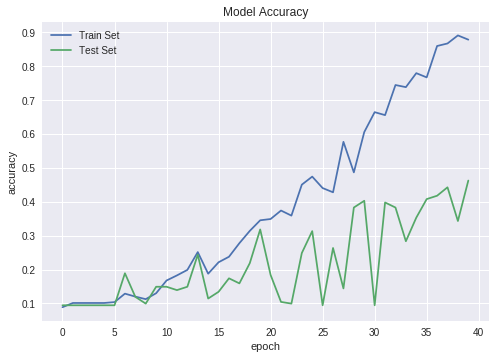

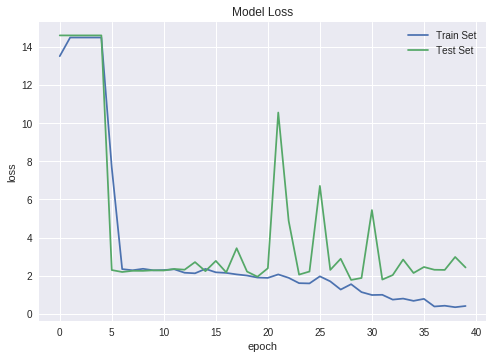

In [0]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train Set', 'Test Set'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train Set', 'Test Set'], loc='upper right')
plt.show()

# code taken from https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

Como se puede apreciar en los gráficos generados, en primer lugar 

## Parte 2: Reconocimiento de Visual

### Actividad 9

            
 Red          |  Numero de parámetros | Profundidad | Rendimiento Image Net (top-5 error rate)
 -------------|-----------------------|-------------|----------
 AlexNet      | 60 millones           | 8           |  19.8%
 VGG-16       | 138 millones          | 16          |  8.08%
 ResNet-50    | 0.75 millones         | 50          |  3.6%
 
<br> 

De este cuadro se puede observar que la red más precisa es la ResNet-50. Es más profunda que el resto, pero a la vez disminuye el número de parámetros a entrenar. Esto lo logra mediante la técnica de aprendisaje residual, que facilita el entrenamiento a medida que se agregan capas a la red.

También se puede observar un aumento considerable de rendimiento entre la red AlexNet y VGG-16. Esto se debe en gran medida a un cambio en la redes convolucionales con respecto AlexNet. En lugar de usar convoluciones de 5x5 y 11x11, la red VGG usa varias capas convolucionales de 3x3, lo que permite capturar mayor cantidad de propiedades, y más finas, a un menor costo. 



### Actividad 10

#### Data

In [0]:
from PIL import Image
import numpy as np
import os

import keras
from keras.applications.resnet50 import ResNet50
from keras.callbacks import ModelCheckpoint


model_resnet = ResNet50(include_top=True, weights=None, input_tensor=None, input_shape=None, pooling=None, classes=25)
# la ultima capa viene con softmax por defecto

model_resnet.compile(loss=keras.losses.categorical_crossentropy,
                    optimizer=keras.optimizers.Adadelta(),
                    metrics=['accuracy'])

Using TensorFlow backend.


In [0]:
# url_places = "https://www.dropbox.com/s/bc8b71zay6s9rb4/Places25.zip?dl=0"
# url_faces = "https://www.dropbox.com/s/yiacgl7jknga963/vggface2_dataset100.zip?dl=0"

! if [ ! -d Places25 ]; then wget "https://www.dropbox.com/s/bc8b71zay6s9rb4/Places25.zip?dl=0"; fi
! if [ ! -d Places25 ]; then unzip -q "Places25.zip?dl=0"; fi 

--2018-05-04 19:59:02--  https://www.dropbox.com/s/bc8b71zay6s9rb4/Places25.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link/gcZPDgoaN0sYkgWQCbAge2hvJtkULuisOm2D3hcEy23LD76nR3y0CbotHbOIZ35B/file [following]
--2018-05-04 19:59:03--  https://dl.dropboxusercontent.com/content_link/gcZPDgoaN0sYkgWQCbAge2hvJtkULuisOm2D3hcEy23LD76nR3y0CbotHbOIZ35B/file
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.81.6, 2620:100:601f:6::a27d:906
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.81.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1748690805 (1.6G) [application/zip]
Saving to: ‘Places25.zip?dl=0’

Places25.zip?dl=0    12%[=>                  ] 202.33M  11.5MB/s    eta 2m 24s 

Places25.zip?dl=0   100%[===================>]   1.63G  11.5MB/s    in 2m 32s  

2018-05-04 20:01:38 (10.9 MB/s) - ‘Places25.zip?dl=0’ saved [1748690805/1748690805]



In [0]:
# val: 500 per label
# test: 500 per label
# train: 4000 images per label
# 25 categories


categories = sorted(os.listdir('./Places25/test/'))
def label_to_vector(label):
    ix = categories.index(label)
    return [0 if i != ix else 1 for i in range(len(categories))]


def gen(n_files_per_label, files):
    # returns the respective files
    since = 0    
    while True:
        since = since % len(files) # loop
        yield files[since:since+n_files_per_label]
        since += n_files_per_label
           

def batches_gen(path_set, n_files_per_label):
    # returns a batch, containing examples of every category
    fs = [] # list of one generator function per label
    for label in os.listdir(path_set):
        fs.append(gen(n_files_per_label, list(os.listdir(path_set + label))))
    while True:
        x = []
        y = []
        for i,label in enumerate(os.listdir(path_set)):
            for file in next(fs[i]):
                y.append(label)
                img = Image.open(path_set + label + '/' + file).convert('RGB')
                img = img.resize((224,224))
                x.append(np.array(img, dtype='float32')) 
        y = [np.array(label_to_vector(i)) for i in y] # to vectors
        yield np.array(x), np.array(y) 

In [0]:
theme = './Places25/'
set_train = 'train/'
set_val = 'val/'

n_epochs = 6
batch_size = 50
n_categories = 25

n_files_per_label_per_batch = batch_size // n_categories

n_files_per_label_train = 4000
total_files_train = n_categories * n_files_per_label_train

n_files_per_label_val = 500
total_files_val = n_categories * n_files_per_label_val

generator = batches_gen(theme + set_train, n_files_per_label_per_batch)
generator_val = batches_gen(theme + set_val, n_files_per_label_per_batch)



checkpointer = ModelCheckpoint(filepath='./model_resnet.hdf5', verbose=1, save_best_only=True)

history_resnet = model_resnet.fit_generator( 
    generator, 
    steps_per_epoch=total_files_train/batch_size * 2 // 5, 
    epochs=n_epochs, 
    verbose=1, 
    callbacks=[checkpointer], 
    validation_data=generator_val, 
    validation_steps=total_files_val/batch_size * 2 // 5, 
    class_weight=None, 
    max_queue_size=10, 
    workers=1, 
    use_multiprocessing=False, 
    shuffle=True, 
    initial_epoch=0)

Epoch 1/6
800/800 [==============================] - 1207s 2s/step - loss: 2.4763 - acc: 0.2952 - val_loss: 4.2039 - val_acc: 0.1756

Epoch 00001: val_loss improved from inf to 4.20395, saving model to ./model_resnet.hdf5
Epoch 2/6
 83/800 [==>...........................] - ETA: 16:58 - loss: 1.8615 - acc: 0.4335

800/800 [==============================] - 1193s 1s/step - loss: 1.6614 - acc: 0.4933 - val_loss: 4.0193 - val_acc: 0.1736

Epoch 00002: val_loss improved from 4.20395 to 4.01926, saving model to ./model_resnet.hdf5
Epoch 3/6
133/800 [===>..........................] - ETA: 15:50 - loss: 1.4902 - acc: 0.5462

800/800 [==============================] - 1193s 1s/step - loss: 1.4005 - acc: 0.5694 - val_loss: 1.8952 - val_acc: 0.4412

Epoch 00003: val_loss improved from 4.01926 to 1.89524, saving model to ./model_resnet.hdf5
Epoch 4/6
146/800 [====>.........................] - ETA: 15:31 - loss: 1.2853 - acc: 0.5958

800/800 [==============================] - 1194s 1s/step - loss: 1.2387 - acc: 0.6155 - val_loss: 1.8475 - val_acc: 0.4852

Epoch 00004: val_loss improved from 1.89524 to 1.84755, saving model to ./model_resnet.hdf5
Epoch 5/6
150/800 [====>.........................] - ETA: 15:27 - loss: 1.1433 - acc: 0.6441

800/800 [==============================] - 1194s 1s/step - loss: 1.1203 - acc: 0.6519 - val_loss: 1.6818 - val_acc: 0.5052

Epoch 00005: val_loss improved from 1.84755 to 1.68183, saving model to ./model_resnet.hdf5
Epoch 6/6
151/800 [====>.........................] - ETA: 15:25 - loss: 1.0701 - acc: 0.6665

800/800 [==============================] - 1193s 1s/step - loss: 1.0286 - acc: 0.6782 - val_loss: 1.9355 - val_acc: 0.4904

Epoch 00006: val_loss did not improve from 1.68183


'\nfor e in range(nb_epoch):\n    print("epoch %d" % e)\n    #for X_train, Y_train in batchs_gen(theme + set_, n_files_per_label_per_batch, n_batchs, nb_epoch): \n    for x_train, y_train in batchs_gen(theme + set_, n_files_per_label_per_epoch): \n        model.fit(x_train, y_train, batch_size=batch_size, nb_epoch=1)'

- El tiempo de entrenamiento total fue de 2 horas. Esto es bastante poco para entrenar una red de este tamaño. Sin embargo, fue suficiente para que comenzara a hacer *overfitting*. 
- Se mantuvo el modelo original, sobre la base de que este ya está completamente optimizado. 
- El algoritmo de optimización utilizado fue el Adadelta. 
- Los parámetros que mejor resultados obtuvieron fueron los default
- El tamaño de los minibatch fue de 50. Este es un número dentro de lo recomendado, y variar su tamaño no cambia de forma significativa la presición del modelo

### Actividad 11

pickle_history.txt
[4.203949472904205, 4.019255259037018, 1.895241723060608, 1.8475461196899414, 1.68182893037796, 1.9354601633548736]


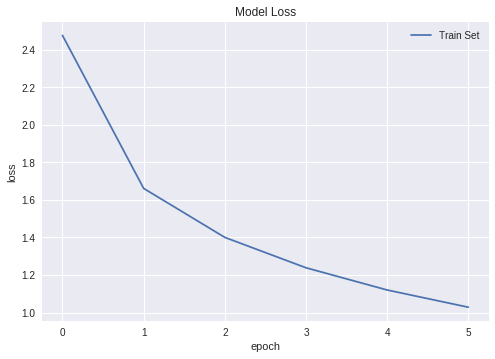

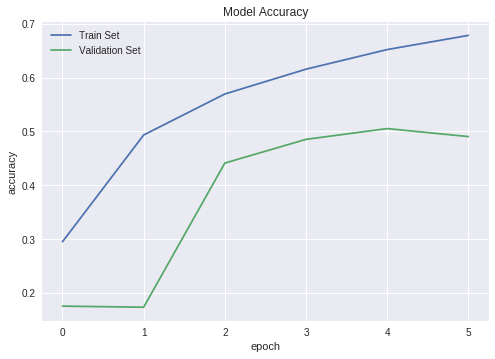

In [0]:
import matplotlib.pyplot as plt

history = history_resnet.history

# summarize history for loss
plt.plot(history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train Set'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train Set', 'Validation Set'], loc='upper left')
plt.show()

# code taken from https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/


En los gráficos se puede observar que se corrieron 6 épocas. Tanto la accuracy del train set como la minimización de  la función de pérdida del training set fueron incrementándo a lo largo de las épocas. Sin embargo, el accuracy del set de validación de la última época empeoró con respecto a la anterior. Esto significa que el modelo está empezando a hacer *overfitting*. Es por esto que para las predicciones se usarán los pesos de la época número 4.

### Actividad 12

In [0]:
model_resnet.load_weights('./model_resnet.hdf5', by_name=False)

total_good = 0
total = 0
results = []
path_set = './Places25/test/'
for label in os.listdir(path_set):
    x = []
    for file in os.listdir(path_set + label):
        img = Image.open(path_set + label + '/' + file).convert('RGB')
        img = img.resize((224,224))
        x.append(np.array(img, dtype='float32'))
    y = model_resnet.predict(np.array(x))
    
    l = [categories[i] for i in np.argmax(y, axis=1)]
    good = l.count(label)
    length = len(l)
    total_good += good
    total += length
    results.append((label, good/length))
    
print('Test accuracy:', total_good / total)
print('Training set accuracy:', history['acc'][-2])
print('Validation set accuracy:', history['val_acc'][-2])

print('Category with maximum accuracy:', max(results, key=lambda x: x[1]))
print('Category with minimum accuracy:', min(results, key=lambda x: x[1]))

Test accuracy: 0.50592
Training set accuracy: 0.6782000042498112
Validation set accuracy: 0.49039999961853026
Category with maximum accuracy: ('shopfront', 427, 500)
Category with minimum accuracy: ('courthouse', 77, 500)


Se puede observar de las accuracy de cada set que el set de validación es una buena aproximación del resultado final del set de test, con una diferencia de accuracy del orden del 1% entre ambos sets. Sin embargo, sus resultados están lejos del set de training. Esto puede deberse a dos factores. Uno, que el set de test y el de validación contienen imágenes muy diferentes con respecto a el set de entrenamiento. Esto es poco probable. La otra opción es que el modelo esté haciendo *overfitting* del set de entrenamiento. Una de las posibles razones de este comportamiento es que el set es demasiado pequeño para esta red. 


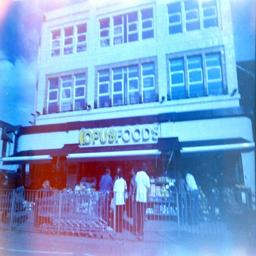

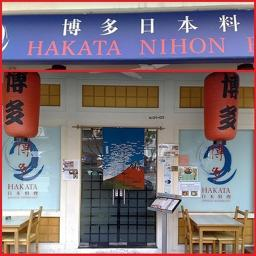

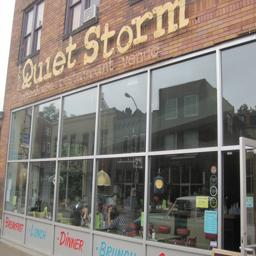

In [0]:
from IPython.display import Image, display
display(Image("./Places25/test/shopfront/00004417.jpg"))
display(Image("./Places25/test/shopfront/00004370.jpg"))
display(Image("./Places25/test/shopfront/00004379.jpg"))

Una posible explicación de porqué esta categoría (de la cual se muestran ejemplo arriba) tuvo el mejor desempeño es debido a los letreros de las tiendas indicando el nombre de esta. Esta es una característica común a una gran porcentaje de las fotos, y es probable que facilite el reconocimiento de esta por el modelo

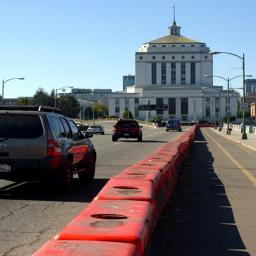

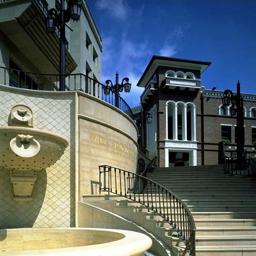

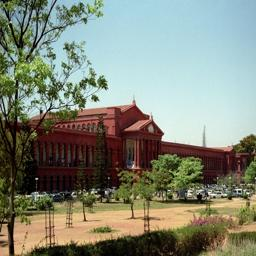

In [0]:
from IPython.display import Image, display
display(Image("./Places25/test/courthouse/00004417.jpg"))
display(Image("./Places25/test/courthouse/00004370.jpg"))
display(Image("./Places25/test/courthouse/00004379.jpg"))

Esta categoría obtuvo el peor desempeño. Esto es probalemente debido a la falta de características comunes entre las fotos. Incluso para el ojo humano cuesta muhco reconocerlos, y son fácilmente confundibles con las de la categoría castle 

In [0]:
!ls

datalab  model_resnet.hdf5  pickle_history  Places25  Places25.zip?dl=0
